In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import collections
from qiskit.visualization import plot_histogram
from quantum.gates.one_control_qubit import classic_one_control_qubit
from qiskit import Aer, transpile, assemble
from fractions import Fraction

In [2]:
# Setup parameters
N = 35
a = 3
no_of_shots = 8096

In [3]:
# Execute the circuit for finding period and plot results of the phases
size = len(bin(N).lstrip("0b"))
circuit = classic_one_control_qubit(size, a, N)

aer_sim = Aer.get_backend('aer_simulator')
t_qc = transpile(circuit, aer_sim)
qobj = assemble(t_qc, shots=no_of_shots)
results = aer_sim.run(qobj).result()
counts = results.get_counts()

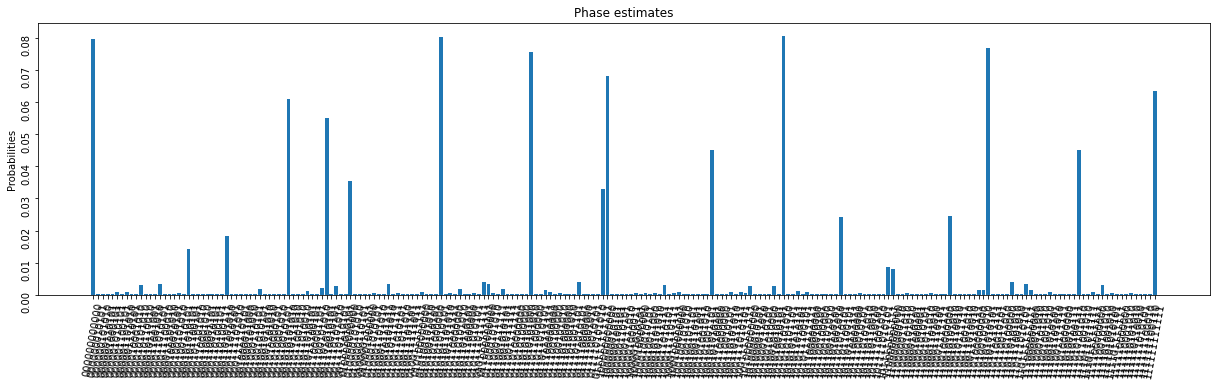

In [25]:
# Plot a bar plot: Note this data is not sorted in any order
data = {}
sum = 0
for output in counts:
    sum += counts[output]


for output in counts:
    data[output[::-1]] = counts[output]/sum

data = collections.OrderedDict(sorted(data.items()))

x, y = [], []
for output in data:
    x.append(output)
    y.append(data[output])

fig, ax = plt.subplots(figsize=(21,5))
plt.xticks(rotation=80)
plt.yticks(rotation=90)
plt.title("Phase estimates")
plt.ylabel("Probabilities")
plt.bar(x, y)

plt.savefig("phase_estimates.png")

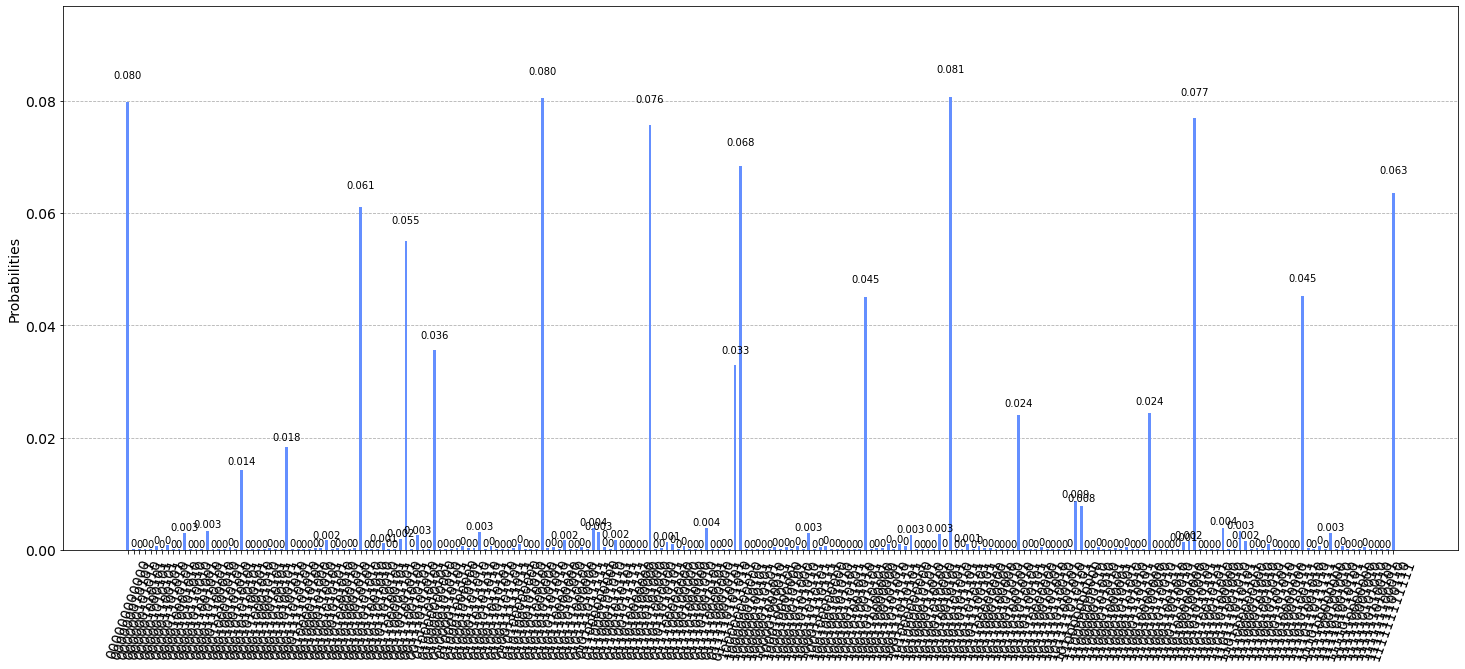

In [26]:
# Plot a bar plot from qiskit method

counts_correct = {}

plot_histogram(counts)

for key in counts.keys():
    c = counts[key]
    key = key[::-1]
    counts_correct[key] = c

counts_correct = collections.OrderedDict(sorted(counts_correct.items()))

plot_histogram(counts_correct, figsize=(25, 10))

In [5]:
# Print results in text

rows, measured_phases = [], []
for output in counts:
    decimal = int(output[::-1], 2)  # Convert (base 2) string to decimal
    phase = decimal/(2**(2*size))  # Find corresponding eigenvalue
    measured_phases.append([phase, counts[output]])
    # Add these values to the rows in our table:
    rows.append([f"{output}(bin) = {decimal:>3}(dec)",
                 f"{decimal}/{2**(2*size)} = {phase:.2f}", counts[output]])
rows.sort(reverse=True, key=lambda x: x[2])
# Print the rows in a table
headers=["Register Output", "Phase", "Counts"]
df = pd.DataFrame(rows, columns=headers)
print(df)

                   Register Output             Phase  Counts
0    010101010101(bin) = 2730(dec)  2730/4096 = 0.67     653
1    101010101010(bin) = 1365(dec)  1365/4096 = 0.33     651
2     000000000000(bin) =   0(dec)     0/4096 = 0.00     645
3    101010101011(bin) = 3413(dec)  3413/4096 = 0.83     622
4    010101010110(bin) = 1706(dec)  1706/4096 = 0.42     612
..                             ...               ...     ...
219   010001110000(bin) = 226(dec)   226/4096 = 0.06       1
220  111111101111(bin) = 3967(dec)  3967/4096 = 0.97       1
221  010100100111(bin) = 3658(dec)  3658/4096 = 0.89       1
222   010100110100(bin) = 714(dec)   714/4096 = 0.17       1
223  011000000011(bin) = 3078(dec)  3078/4096 = 0.75       1

[224 rows x 3 columns]


In [6]:
# Print results in text

rows = []
for _, phase in enumerate(measured_phases):
    frac = Fraction(phase[0]).limit_denominator(N)
    rows.append([phase[0], phase[1], f"{frac.numerator}/{frac.denominator}", frac.denominator])
# Print as a table
headers=["Phase", "Counts", "Fraction", "Guess for r"]
rows.sort(reverse=True, key=lambda x: x[1])
df = pd.DataFrame(rows, columns=headers)
print(df)

        Phase  Counts Fraction  Guess for r
0    0.666504     653      2/3            3
1    0.333252     651      1/3            3
2    0.000000     645      0/1            1
3    0.833252     622      5/6            6
4    0.416504     612     5/12           12
..        ...     ...      ...          ...
219  0.055176       1     1/18           18
220  0.968506       1    31/32           32
221  0.893066       1    25/28           28
222  0.174316       1     4/23           23
223  0.751465       1      3/4            4

[224 rows x 4 columns]
